## **Primer Parcial: Inteligencia Artificial 1**

# Dataset elegido: Census Income (Ingresos del Censo) de UCI

## **Clasificación binaria**

In [ ]:

import numpy as np
from matplotlib import pyplot
%matplotlib inline


**1. Carga y preprocesamiento de datos**

In [ ]:
# Descargar dataset completo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

# Cargar datos con limpieza inicial de espacios
data = np.genfromtxt(url, delimiter=',', dtype=str, skip_header=0, autostrip=True)

print("\nEjemplo de 5 filas del dataset original:")
for i in range(5):
    print(f"Fila {i+1}: {list(zip(column_names, data[i]))}")

# Limpieza: eliminar filas con valores faltantes ('?')
print("\nRealizando limpieza (eliminando filas con valores faltantes '?')...")
data = np.array([row for row in data if not any('?' in cell for cell in row)])

# Separar características y target
X_raw = data[:, :-1]
y = np.where(np.char.strip(data[:, -1]) == '>50K', 1, 0)
# Mostrar distribución de clases
print("\nDistribución de clases:")
print(f"- Income <=50K: {np.sum(y == 0)} casos")
print(f"- Income >50K: {np.sum(y == 1)} casos")

categorical_cols = [1, 3, 5, 6, 7, 8, 9, 13]  # workclass, education, marital-status, etc.

# Verificación
print("Dimensión de X_raw:", X_raw.shape)

def one_hot_encode(column):
    categories = np.unique(column)
    encoding = np.zeros((len(column), len(categories)))
    for i, category in enumerate(categories):
        encoding[:, i] = (column == category).astype(int)
    return encoding

# Procesar cada columna categórica
encoded_features = []
for col_idx in categorical_cols:
    encoded = one_hot_encode(X_raw[:, col_idx])
    encoded_features.append(encoded)


# Convertir características numéricas
numeric_features = X_raw[:, [0, 2, 4, 10, 11, 12]].astype(float)  # Columnas numéricas

# Normalización manual de características numéricas
numeric_features = (numeric_features - np.mean(numeric_features, axis=0)) / np.std(numeric_features, axis=0)

X = np.concatenate([np.ones((X_raw.shape[0], 1)), numeric_features] + encoded_features, axis=1)


# Dividir en train (80%) y test (20%)
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]



Ejemplo de 5 filas del dataset original:
Fila 1: [('age', np.str_('39')), ('workclass', np.str_('State-gov')), ('fnlwgt', np.str_('77516')), ('education', np.str_('Bachelors')), ('education-num', np.str_('13')), ('marital-status', np.str_('Never-married')), ('occupation', np.str_('Adm-clerical')), ('relationship', np.str_('Not-in-family')), ('race', np.str_('White')), ('sex', np.str_('Male')), ('capital-gain', np.str_('2174')), ('capital-loss', np.str_('0')), ('hours-per-week', np.str_('40')), ('native-country', np.str_('United-States')), ('income', np.str_('<=50K'))]
Fila 2: [('age', np.str_('50')), ('workclass', np.str_('Self-emp-not-inc')), ('fnlwgt', np.str_('83311')), ('education', np.str_('Bachelors')), ('education-num', np.str_('13')), ('marital-status', np.str_('Married-civ-spouse')), ('occupation', np.str_('Exec-managerial')), ('relationship', np.str_('Husband')), ('race', np.str_('White')), ('sex', np.str_('Male')), ('capital-gain', np.str_('0')), ('capital-loss', np.str_('0

**2. Funciones básicas**

In [ ]:
def sigmoid(z):
    """Función sigmoide para la regresión logística"""
    return 1 / (1 + np.exp(-z))

def calcularCosto(theta, X, y):
    """Función de costo para regresión logística"""
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    """Implementación del descenso de gradiente"""
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history


**3. Entrenamiento del modelo**

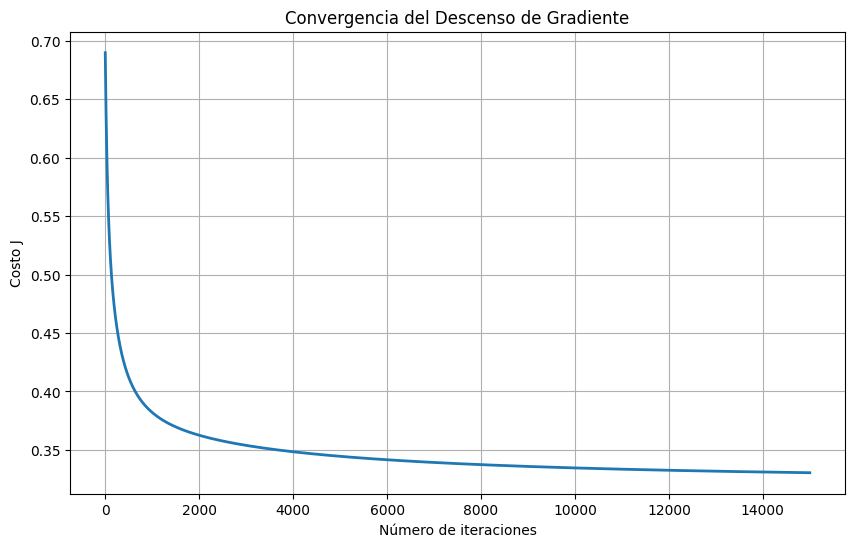

In [ ]:
# Hiperparámetros
alpha = 0.01  # Tasa de aprendizaje
num_iters = 15000  # Iteraciones

# Inicializar theta y entrenar
theta = np.zeros(X_train.shape[1])
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Gráfica de convergencia
pyplot.figure(figsize=(10, 6))
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso de Gradiente')
pyplot.grid(True)
pyplot.show()


**4. Evaluación del modelo**

In [ ]:
def predict(theta, X, threshold=0.5):
    """Función de predicción"""
    return sigmoid(X.dot(theta.T)) >= threshold

# Precisión en entrenamiento y prueba
train_accuracy = np.mean(predict(theta, X_train) == y_train) * 100
test_accuracy = np.mean(predict(theta, X_test) == y_test) * 100

print(f"Precisión en entrenamiento: {train_accuracy:.2f}%")
print(f"Precisión en prueba: {test_accuracy:.2f}%")


Precisión en entrenamiento: 84.67%
Precisión en prueba: 84.45%


## **RED NEURONAL**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


**1. Preparación de datos (usando X e y del preprocesamiento anterior)**

In [ ]:
# Convertir a tensores de PyTorch
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# Dividir en train (80%) y validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


**2. Definición del modelo MLP**

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Hiperparámetros
input_size = X_train.shape[1]
hidden_size = 64
learning_rate = 0.003
epochs = 200
batch_size = 64

# Inicializar modelo
model = SimpleMLP(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


**3. Entrenamiento y validación**

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Función para calcular accuracy
def calculate_accuracy(y_true, y_pred):
    y_pred = (y_pred > 0.5).float()
    return (y_pred == y_true).float().mean()

for epoch in range(epochs):
    # Entrenamiento
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    # Mini-batch training
    for i in range(0, len(X_train), batch_size):
        # Obtener batch
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += calculate_accuracy(labels, outputs)

    # Calcular métricas de entrenamiento
    train_loss /= (len(X_train) / batch_size)
    train_acc /= (len(X_train) / batch_size)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_acc = calculate_accuracy(y_val, val_outputs)

        val_losses.append(val_loss.item())
        val_accs.append(val_acc.item())

    # Log cada 5 épocas
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], '
              f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
              f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')


Epoch [5/200], Train Loss: 0.4453, Val Loss: 0.4360, Train Acc: 0.7674, Val Acc: 0.7660
Epoch [10/200], Train Loss: 0.3775, Val Loss: 0.3725, Train Acc: 0.8246, Val Acc: 0.8303
Epoch [15/200], Train Loss: 0.3581, Val Loss: 0.3538, Train Acc: 0.8314, Val Acc: 0.8382
Epoch [20/200], Train Loss: 0.3486, Val Loss: 0.3446, Train Acc: 0.8355, Val Acc: 0.8432
Epoch [25/200], Train Loss: 0.3420, Val Loss: 0.3384, Train Acc: 0.8387, Val Acc: 0.8475
Epoch [30/200], Train Loss: 0.3370, Val Loss: 0.3337, Train Acc: 0.8415, Val Acc: 0.8485
Epoch [35/200], Train Loss: 0.3332, Val Loss: 0.3302, Train Acc: 0.8445, Val Acc: 0.8498
Epoch [40/200], Train Loss: 0.3302, Val Loss: 0.3275, Train Acc: 0.8484, Val Acc: 0.8512
Epoch [45/200], Train Loss: 0.3278, Val Loss: 0.3253, Train Acc: 0.8498, Val Acc: 0.8528
Epoch [50/200], Train Loss: 0.3259, Val Loss: 0.3235, Train Acc: 0.8508, Val Acc: 0.8540
Epoch [55/200], Train Loss: 0.3243, Val Loss: 0.3221, Train Acc: 0.8512, Val Acc: 0.8540
Epoch [60/200], Train 

**4. Gráficas de pérdida y precisión**

Epoch [5/200], Train Loss: 0.4524, Val Loss: 0.4423, Train Acc: 0.7655, Val Acc: 0.7621
Epoch [10/200], Train Loss: 0.3792, Val Loss: 0.3737, Train Acc: 0.8244, Val Acc: 0.8278
Epoch [15/200], Train Loss: 0.3589, Val Loss: 0.3545, Train Acc: 0.8305, Val Acc: 0.8371
Epoch [20/200], Train Loss: 0.3493, Val Loss: 0.3455, Train Acc: 0.8359, Val Acc: 0.8422
Epoch [25/200], Train Loss: 0.3427, Val Loss: 0.3393, Train Acc: 0.8389, Val Acc: 0.8450
Epoch [30/200], Train Loss: 0.3376, Val Loss: 0.3346, Train Acc: 0.8414, Val Acc: 0.8478
Epoch [35/200], Train Loss: 0.3336, Val Loss: 0.3309, Train Acc: 0.8443, Val Acc: 0.8505
Epoch [40/200], Train Loss: 0.3305, Val Loss: 0.3280, Train Acc: 0.8464, Val Acc: 0.8513
Epoch [45/200], Train Loss: 0.3280, Val Loss: 0.3257, Train Acc: 0.8473, Val Acc: 0.8523
Epoch [50/200], Train Loss: 0.3260, Val Loss: 0.3239, Train Acc: 0.8504, Val Acc: 0.8531
Epoch [55/200], Train Loss: 0.3244, Val Loss: 0.3224, Train Acc: 0.8508, Val Acc: 0.8531
Epoch [60/200], Train 

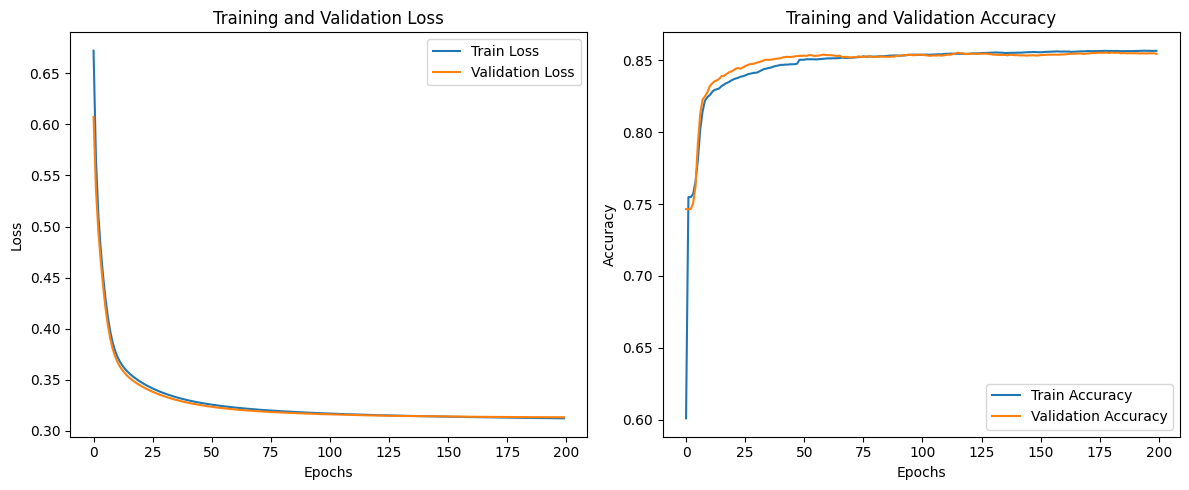


Precisión final en validación: 0.8545


In [ ]:
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



**5. Evaluación final**

In [ ]:
model.eval()
with torch.no_grad():
    # Calcular precisión final
    y_pred = model(X_val)
    y_pred_class = (y_pred > 0.5).float()
    final_acc = (y_pred_class == y_val).float().mean()

print(f'\nPrecisión final en validación: {final_acc.item():.4f}')